In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn import preprocessing
import statsmodels.api as sm

In [2]:
# import the data
df = pd.read_csv(r'./input/Boston.csv')
x = df.values
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [3]:
df_scaled = pd.DataFrame(x_scaled , columns= df.columns)

In [4]:
def create_df_without_explantory(df:pd.DataFrame, output_var ='nox' ):
    return df.drop(['Unnamed: 0', output_var], axis=1) , df[output_var].to_numpy()

In [5]:
df_X , y = create_df_without_explantory(df_scaled)

In [6]:
def get_OLS_model(X, y):
    X = sm.add_constant(X)
    return sm.OLS(y, X ).fit()

In [7]:
models = [get_OLS_model(df_X[col] , y ) for col in df_X.columns]

In [8]:
adjusted_r2 = [m.rsquared_adj for m in models]

In [9]:
ordered_indeces = np.argsort(np.abs(adjusted_r2))[-1::-1]

In [21]:
best_index = ordered_indeces[0]
best_col_name = df_X.columns[best_index]
best_correlation_value =  adjusted_r2[best_index]

print(f'Var with best R2: {best_col_name}; with adjusted R2: {best_correlation_value}')
print(f'Best predictor: {best_col_name}')

# print(f'{corr_coeff[ordered_indeces][1]}')

Var with best R2: dis; with adjusted R2: 0.5909048777424147
Best predictor: dis


In [12]:
# now providing the best regression model
winning_model = models[best_index]

In [13]:
winning_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     730.4
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          4.23e-100
Time:                        08:49:27   Log-Likelihood:                 234.59
No. Observations:                 506   AIC:                            -465.2
Df Residuals:                     504   BIC:                            -456.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5813      0.011     53.123      0.000       0.560       0.603
dis           -0.9578      0.035    -27.027      0.000      -1.027      -0.888
==============================================================================
Omnibus:                       71.354   Durbin-Watson:                   0.211
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.560
Skew:                           0.983   Prob(JB):                     1.46e-22
Kurtosis:                       3.953   Cond. No.                         5.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
unscaled_input = df[best_col_name]

In [15]:
def scaled_back(scaled, min_value, max_value):
    amplifier = max_value - min_value
    return min_value + amplifier * scaled

In [16]:
min_X_value, max_X_value = df[best_col_name].min() ,df[best_col_name].max()
min_y_value , max_y_alue = df.nox.min(), df.nox.max()

In [32]:
def get_scaled_prediction(model , n_samples=100):
    X_prime = np.linspace(0.0, 1.0, num=n_samples)
    X_prime = sm.add_constant(X_prime)
    return  X_prime[:,1], model.predict(X_prime)


In [33]:
import matplotlib.pyplot as plt
scaled_inputs, scaled_predictions = get_scaled_prediction(winning_model)

In [30]:
unscaled_predictions = scaled_back(scaled_predictions, min_y_value, max_y_alue)
unscaled_inputs = scaled_back(scaled_inputs , min_X_value, max_X_value)

In [40]:
unscaled_predictions.shape

(100,)

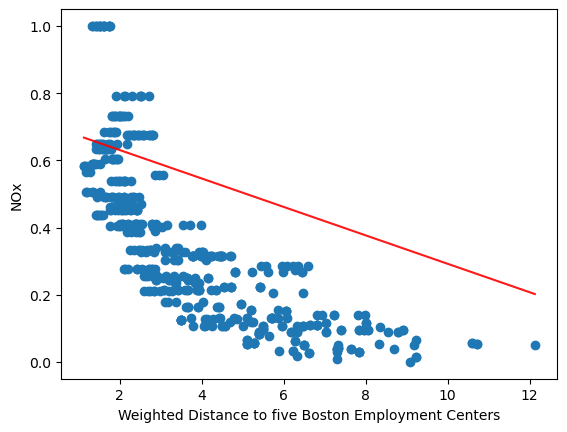

In [43]:
plt.scatter(df[best_col_name], y)
plt.xlabel("Weighted Distance to five Boston Employment Centers")
plt.ylabel("NOx")
plt.plot(unscaled_inputs, unscaled_predictions, 'red', alpha=0.9)